In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
import statistics as stat

In [2]:
import numpy as np

def sigmoid(z):
    e=2.71828
    return 1.0 / (1.0 + e ** -z)

def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    
    m1= X.shape
    m=int(str(m1[0]));n=int(str(m1[1]))
    w = np.zeros((n,1))
    b = 0
    
    # Gradient descent
    for i in range(num_iterations):
        z = np.dot(X, w) + b
        h = sigmoid(z);eps=0.1
        h = np.clip(h, eps, 1-eps)
        
        #cost
        cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
        
        #gradients
        dw = (1/m) * np.dot(X.T, (h-y))
        db = (1/m) * np.sum(h-y)
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    params = {"w": w, "b": b}
    return params

# importing data

df=pd.read_csv("OneDrive\Desktop/ghg1.csv")
X = df.iloc[:157,29];X=np.array(X);X=X.reshape(156,1)
y = df.iloc[:157,55];y=np.array(y);y=y.T;y=y.reshape(156,1)
yl = [element for innerList in y for element in innerList]
print("Stdev before Normalization: ",stat.stdev(list(yl)))
mina=min(y);maxa=max(y);minmax=[];nmina=0;nmaxa=1
for v in y:
    v1=((v-mina)/(maxa-mina))*((nmaxa-nmina)+nmina)
    minmax.append(v1)
y=np.array(minmax)
yl = [element for innerList in y for element in innerList]
print("Stdev after Normalization: ",stat.stdev(yl))
params = logistic_regression(X, y, learning_rate=0.01, num_iterations=1500)

z = np.dot(X, params["w"].T) + params["b"]
predictions = sigmoid(z)


Stdev before Normalization:  238.02629227042567
Stdev after Normalization:  0.13133943278533955
Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.3302408907402007
Cost after iteration 200: 0.27868626338424735
Cost after iteration 300: 0.2539192054224876
Cost after iteration 400: 0.2405640468938888
Cost after iteration 500: 0.23087211740325347
Cost after iteration 600: 0.22370184896648931
Cost after iteration 700: 0.21831865518176785
Cost after iteration 800: 0.21702850449356512
Cost after iteration 900: 0.21702850449356512
Cost after iteration 1000: 0.21702850449356512
Cost after iteration 1100: 0.21702850449356512
Cost after iteration 1200: 0.21702850449356512
Cost after iteration 1300: 0.21702850449356512
Cost after iteration 1400: 0.21702850449356512


In [3]:
def estimate_coef(x, y):
    t1=t2=0;w1=0
    mx=(sum(x)/len(x))
    my=(sum(y)/len(y))
    for i in range(len(x)):
        t1+= (x[i]-mx)*(y[i]-my)
        t2+= (x[i]-mx)**2
    w1=t1/t2
    w0=my-w1*mx

    return (w0, w1)

In [4]:
def plot_regression_line(X,y, w):
    
    pred=[]
    for x in X:
        y1=w[0]+w[1]*x
        pred.append(y1)
    #Plotting Regression Line
    plt.scatter(X,y, color="black")
    plt.plot(X,pred, color='green')
    plt.ylabel('Green House Gas Emission')
    plt.xlabel('Number of years')
    plt.title('LINEAR REGRESSION PLOT')
    plt.show()  
    mabe= round(metrics.median_absolute_error(y,pred), 8)
    mse= metrics.mean_squared_error(y,pred)
    mae= round(metrics.mean_absolute_error(y,pred), 8)
    r2= round(metrics.r2_score(y,pred)*100, 2)
    r2= str(r2)+'%'
    return pd.DataFrame(data=[['Accuracy',r2],['Mean Absolute Error',mae],['Mean Squared Error',mse],['Median Absolute Error',mabe]],
                        columns=['Metrics','Values'])

156 156
Train set size:  109 
Test set size 47
Estimated coefficients:
W0 = [-0.00871469] 
W1 = [0.03709014]


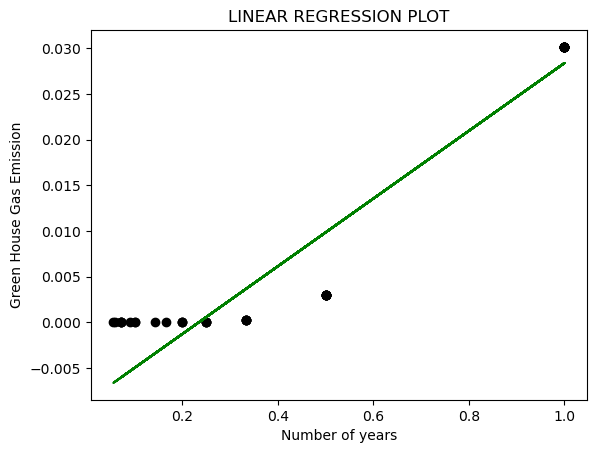

,Metrics,Values
0,Accuracy,90.21%
1,Mean Absolute Error,0.003616
2,Mean Squared Error,0.000018
3,Median Absolute Error,0.00336


In [5]:
#LINEAR REGRESSION
x = 1/X

y = predictions

print(len(x),len(y))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=2)
print('Train set size: ',len(X_train),'\nTest set size',len(X_test))


w = estimate_coef(list(X_train), list(y_train))
print("Estimated coefficients:\nW0 = {} \
\nW1 = {}".format(w[0], w[1]))

d=plot_regression_line(X_test, y_test, w)
d